In [15]:
from top2vec import Top2Vec
# from sklearn.datasets import fetch_20newsgroups
import pandas as pd
from pathlib import Path

# newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))



In [16]:
RAW_FILE = "sample50k_health_tech.csv"

In [26]:
df = pd.read_csv(
  Path("../data/subsamples")/RAW_FILE,
  usecols = (0,4)
  )
df.columns = ["article_id", "article"]
df = df.dropna(subset=['article'])

In [25]:
len(df.article.values.tolist())

5

In [27]:
model = Top2Vec(documents=df.article.values,  embedding_model='universal-sentence-encoder', speed="learn", workers=10)

2022-05-12 16:40:13,872 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
c:\Users\angel\miniconda3\envs\fourthbrain-glg\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-05-12 16:41:13,821 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-05-12 16:41:27,675 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-05-12 16:43:45,228 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-05-12 16:44:04,773 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-

In [28]:

model.get_num_topics()

269

In [29]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [30]:
topic_sizes, topic_nums

(array([1497, 1288,  674,  423,  358,  332,  324,  317,  313,  298,  298,
         285,  281,  280,  268,  260,  259,  254,  250,  242,  232,  232,
         224,  222,  219,  208,  206,  201,  201,  199,  197,  184,  183,
         183,  182,  180,  178,  177,  175,  174,  171,  170,  170,  168,
         167,  167,  167,  158,  158,  154,  154,  154,  152,  149,  145,
         143,  138,  136,  135,  134,  133,  133,  132,  132,  131,  128,
         127,  127,  127,  122,  122,  121,  120,  120,  120,  119,  118,
         117,  116,  115,  115,  115,  113,  113,  112,  108,  107,  106,
         105,  104,  103,  103,  102,  102,  100,   99,   99,   99,   99,
          98,   97,   97,   97,   96,   96,   96,   95,   95,   94,   93,
          93,   93,   92,   91,   91,   89,   88,   87,   85,   85,   83,
          83,   82,   80,   80,   80,   80,   78,   78,   77,   77,   77,
          76,   75,   74,   74,   74,   73,   73,   73,   73,   72,   72,
          71,   69,   68,   67,   67, 

In [69]:
topic_words, word_scores, topic_nums = model.get_topics(269)

In [73]:
print(topic_words.shape)


(269, 50)


In [77]:
pd.DataFrame(topic_words).to_csv("../results/topics/sample50k_health_tech_top2vec.csv", index=False)

In [49]:
hierarchy = model.hierarchical_topic_reduction(20)
num_subtopics = [len(t) for t in hierarchy]

In [94]:
topic_list = []
for i, h in enumerate(hierarchy):
    bla = list(zip([i] * len(h), h))
    topic_list.extend(bla)


topic_list = sorted(topic_list, key=lambda x: x[1])
topic_list = pd.DataFrame(topic_list, columns = ["topic_level1", "topic_level2"])
topic_list

,topic_level1,topic_level2
0,0,0
1,6,1
2,2,2
3,7,3
4,17,4
...,...,...
264,3,264
265,18,265
266,9,266
267,9,267


In [70]:
# hierarchy = model.get_topic_hierarchy()
num_subtopics = [len(t) for t in hierarchy]
num_subtopics

[10, 31, 18, 25, 12, 17, 3, 9, 19, 17, 11, 17, 8, 15, 15, 8, 13, 7, 8, 6]

In [71]:
hierarchy[7]

[132, 155, 16, 34, 199, 84, 104, 235, 3]

In [72]:
topic_words[132], topic_words[155], topic_words[16]

(array(['youtubers', 'youtube', 'pewdiepie', 'leafy', 'subscribers',
        'patreon', 'monetize', 'flagged', 'granular', 'controversies',
        'gawker', 'activists', 'alleging', 'censoring', 'retweets',
        'videos', 'outcry', 'prohibiting', 'viral', 'backlash',
        'retweeted', 'denounced', 'flagging', 'tweeting', 'advocated',
        'controversy', 'objectionable', 'censorship', 'assaulted',
        'censor', 'techcrunch', 'trending', 'optimized', 'tolerant',
        'unsafe', 'banning', 'explicit', 'viewers', 'misused', 'tolerated',
        'uproar', 'neutrality', 'glyphosate', 'subscriber', 'desist',
        'partnered', 'aimed', 'compromised', 'resulted', 'gizmodo'],
       dtype='<U15'),
 array(['tweeting', 'twitter', 'tweets', 'retweets', 'tweet', 'tweeted',
        'retweeted', 'trending', 'hashtags', 'followers', 'hashtag', 'gab',
        'influencers', 'emojis', 'emoji', 'follower', 'overuse',
        'instagram', 'foursquare', 'flipboard', 'weibo', 'soundcloud',

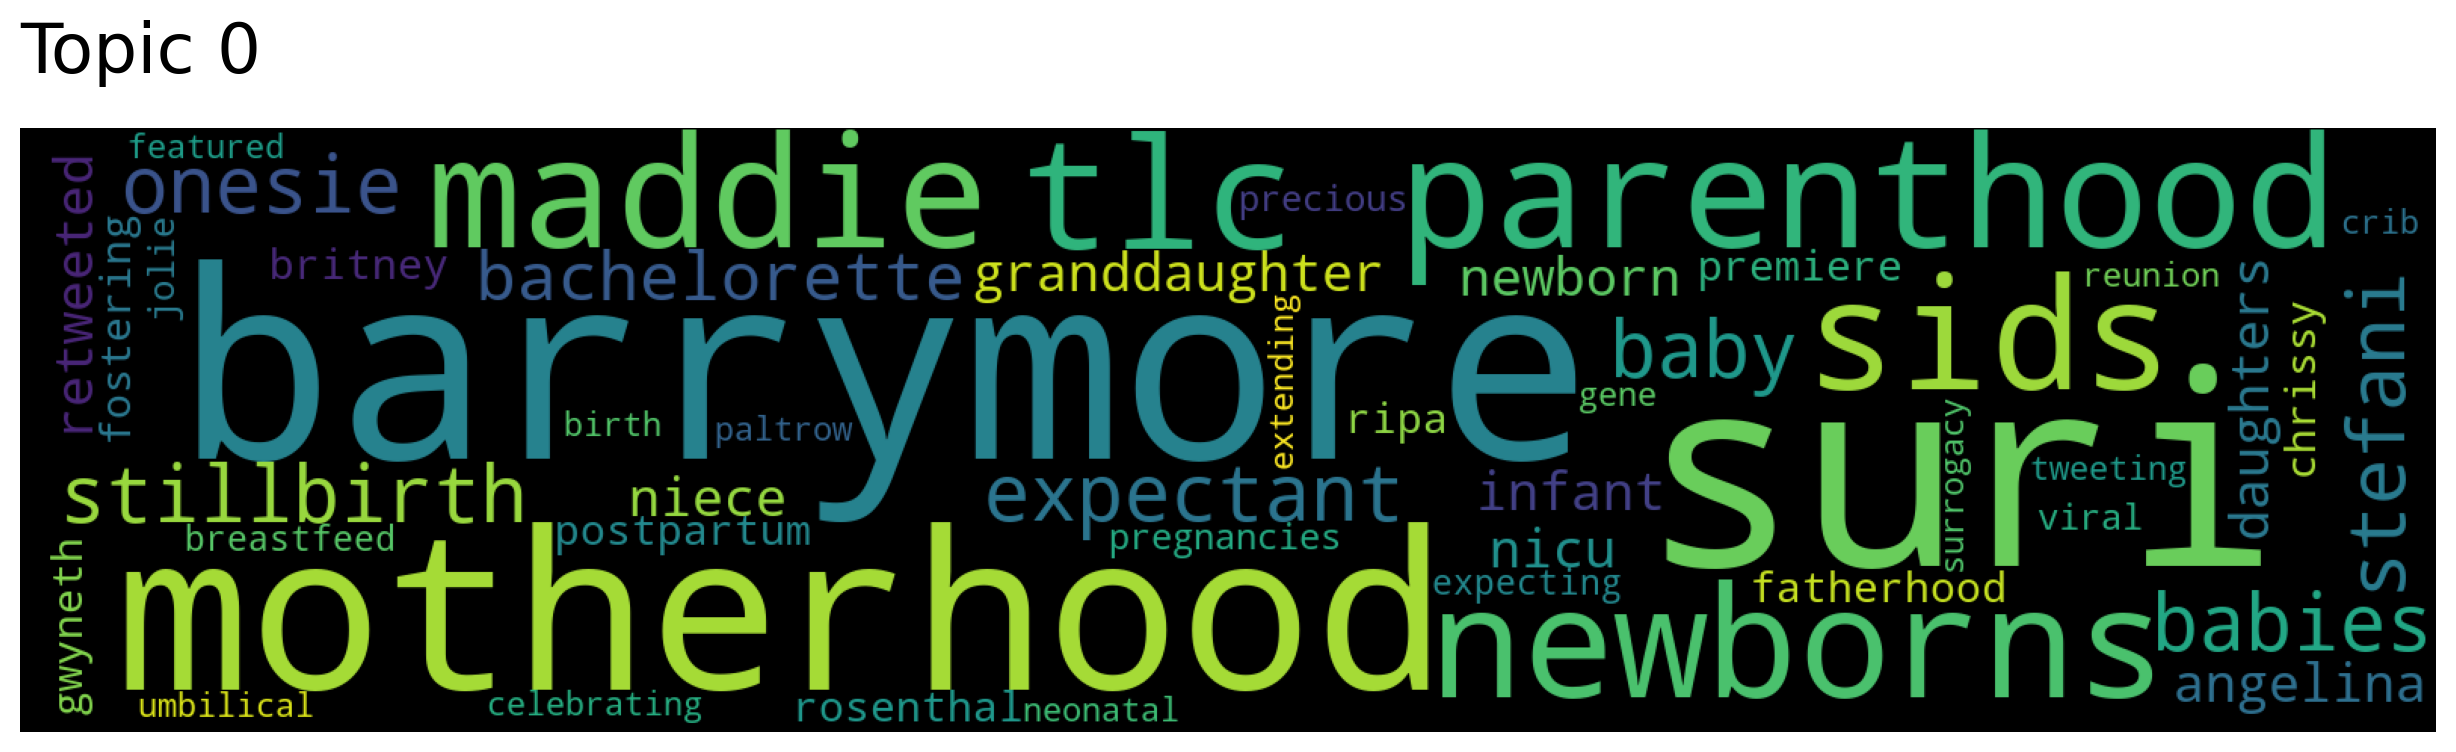

In [60]:
model.generate_topic_wordcloud(0)

In [53]:
print(len(hierarchy[1]))
hierarchy[0]

31


[22, 226, 19, 239, 244, 240, 136, 181, 191, 0]

In [61]:

topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["food"], num_topics=5)

In [63]:
print(len(topic_words))
topic_words[:3], topic_nums[:3], topic_scores[:3], topic_nums[:3]

5


([array(['cookbook', 'cooking', 'cooker', 'cooks', 'cook', 'stove',
         'culinary', 'bake', 'kitchens', 'baking', 'frying', 'foodborne',
         'recipes', 'dinners', 'recipe', 'kitchen', 'chefs', 'dishes',
         'pantry', 'microwave', 'undercooked', 'oven', 'grilling', 'chef',
         'cooked', 'takeout', 'boiling', 'meals', 'appliance', 'takeaway',
         'appliances', 'baked', 'celiac', 'turmeric', 'housewives', 'dish',
         'prepping', 'boil', 'lentils', 'soups', 'ingredients', 'seasoned',
         'grubhub', 'krieger', 'inventors', 'menu', 'joanne', 'quinoa',
         'pan', 'botulism'], dtype='<U15'),
  array(['nutritionist', 'nutritional', 'nutritionists', 'statin',
         'dietitian', 'healthiest', 'satiety', 'quinoa', 'triglycerides',
         'keto', 'healthier', 'ldl', 'statins', 'dietary', 'hdl', 'caloric',
         'carbs', 'diets', 'vegetarians', 'dietetics', 'carbohydrate',
         'veggies', 'servings', 'almonds', 'chickpeas', 'legumes',
         'veg

In [37]:
# search for words similar to space
words, word_scores = model.similar_words(keywords=["apple"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

apples 0.8151408489097347
macs 0.5418811219385375
macbooks 0.5389670149624934
iphone 0.5387668367440774
iphones 0.5302742113235641
macos 0.5166396608754811
fruit 0.5129877766383879
mac 0.5017950704548758
ios 0.49609992244111634
imac 0.49487770942150766
itunes 0.48837972420555825
banana 0.4881815286969149
android 0.4846345836525796
microsoft 0.4846130907513201
fruits 0.48243893666991505
keynote 0.48111010627120704
pie 0.47509758104004063
ipod 0.4735499381474478
foxconn 0.46987375830497935
blackberry 0.4692226081434503


### Search document by topic

In [64]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=147, num_docs=5)

In [65]:
documents[0]

'The smart-home market is big and booming. Connected products, like those made by Roku, Nest, Sonos, and Amazon have changed the way we live, mostly for the better. But the so called smart kitchen? The app-connected kitchen gadgets, the experimental tiny ovens, the microwaves you can talk to, and the recipe apps? They\'ve failed. While our first whack at the connected home kitchen was interesting and occasionally even fun, for the most part it has flopped like a soufflé. It\'s time to wipe down the counter, tighten our apron strings, and start from scratch. Harsh? Maybe. But most of the smart-kitchen devices I\'ve reviewed in the past few years would not get a passing grade. In fact, for all the kitchen testing I do, none of my favorite kitchen gear is connected. Despite the influx of tech, my favorite kitchen tools are still my knives, a 25-cent plastic pocket scraper, and an old, wood-handled silicone spoonula from Williams-Sonoma. The item I’m most excited to buy next is one of thos